### 데이터 불러오기

In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/digit.csv")
df.head(10)

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


### EDA 및 Feature Engineering

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

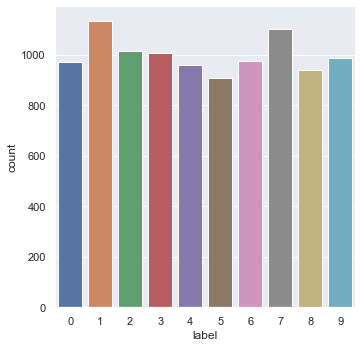

In [17]:
sns.catplot(data=df, x ='label',kind='count')

<function matplotlib.pyplot.show(*args, **kw)>

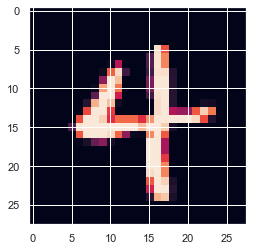

In [29]:
numbers = df.drop(['label'],axis=1)

nth = 0
img = np.reshape(numbers.iloc[nth].values,[28, 28])
plt.imshow(img)
plt.show

### 데이터셋 만들기

In [32]:
train_data = df.drop('label', axis=1)
target_data = df['label']

print(train_data.shape,target_data.shape)

(10000, 784) (10000,)


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.2)

print(train_data.shape, x_train.shape, x_test.shape)

(10000, 784) (8000, 784) (2000, 784)


### 모델링 & 학습

In [42]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)

In [44]:
# 학습
forest.fit(x_train, y_train)
print("training set accuracy: ",forest.score(x_train,y_train))

training set accuracy:  1.0


### 모델 평가 및 검증

In [45]:
print("test set accuracy: ",forest.score(x_test,y_test))

test set accuracy:  0.9355


### 결론 도출

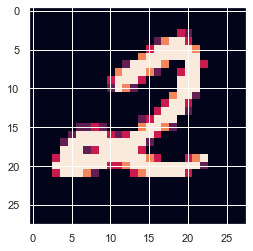

2


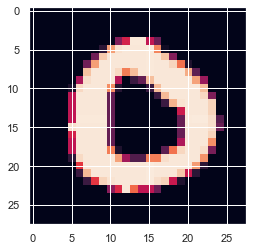

0


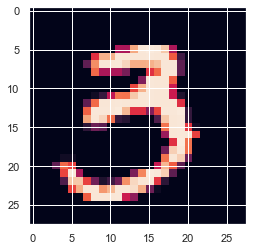

3


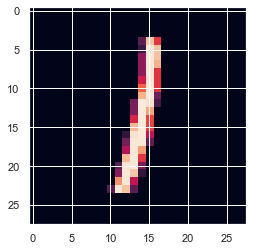

1


In [50]:
import random
for i in range(4):
    n = random.randrange(0,len(x_test))
    
    img = np.reshape(x_test.iloc[n].values,[28,28])
    plt.imshow(img)
    plt.show()
    result = forest.predict([x_test.iloc[n].values])[0]
    print(result)